In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files
uploaded = files.upload()

Saving credit_card_transactions.csv to credit_card_transactions.csv


In [ ]:
df = pd.read_csv("credit_card_transactions.csv")

In [ ]:
df.head()

,TransactionID,CustomerID,TransactionAmount,TransactionTime,CustomerAge,Merchant,TransactionType
0,1,1102,930.72,6,68,Reliance,ATM
1,2,1435,79.71,3,62,Amazon,POS
2,3,1860,216.83,5,63,Amazon,Online
3,4,1270,674.43,0,27,Reliance,ATM
4,5,1106,365.06,4,60,Reliance,Online


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      500 non-null    int64  
 1   CustomerID         500 non-null    int64  
 2   TransactionAmount  500 non-null    float64
 3   TransactionTime    500 non-null    int64  
 4   CustomerAge        500 non-null    int64  
 5   Merchant           500 non-null    object 
 6   TransactionType    500 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 27.5+ KB


In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
TransactionAmount,0
TransactionTime,0
CustomerAge,0
Merchant,0
TransactionType,0


In [ ]:
X = df[['TransactionAmount', 'TransactionTime', 'CustomerAge']].values

In [ ]:
X

array([[930.72,   6.  ,  68.  ],
       [ 79.71,   3.  ,  62.  ],
       [216.83,   5.  ,  63.  ],
       ...,
       [175.06,   7.  ,  37.  ],
       [879.84,  19.  ,  25.  ],
       [500.47,  21.  ,  60.  ]])

In [ ]:

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

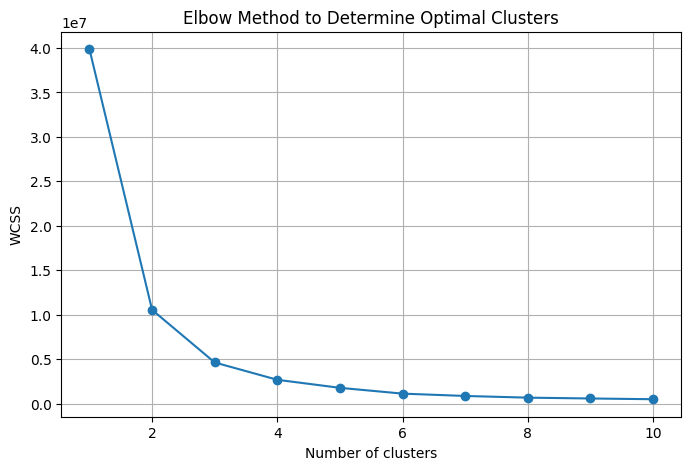

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

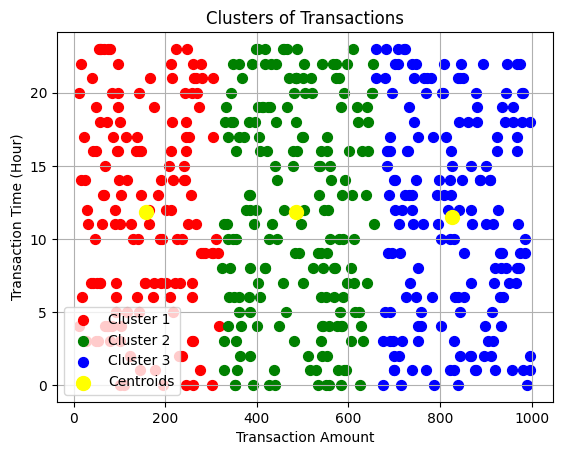

In [ ]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='blue', label='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='yellow', label='Centroids')

plt.title('Clusters of Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time (Hour)')
plt.legend()
plt.grid(True)
plt.show()